<font size="+3"><strong>Data Exploration</strong></font>

#### This project centers around households that have either been denied credit or harbor concerns about credit rejection. The exploration will delve into features such as Race, Age, Assets, Education, Income, and Debt to gain insights into these households.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data
df = pd.read_csv("data/scfp2022excel.zip")
print("df shape:", df.shape)
df.head()

df shape: (22975, 356)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956120,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,...,4,2,5,2,1,8,3,3,2,1
2,1,13,3163.637766,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,1,1
3,1,14,3166.228463,2,70,5,9,3,2,2,...,3,2,4,1,1,6,3,2,1,1
4,1,15,3235.624715,2,70,5,9,3,2,2,...,3,2,4,2,1,8,3,3,1,1


The official [Code Book](https://sda.berkeley.edu/sdaweb/docs/scfcomb2022/DOC/hcbk.htm) gives more details about each column

In [3]:
df_fear = df[df["TURNFEAR"] == 1]
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear shape: (3839, 356)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
20,5,51,7191.481109,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
21,5,52,7352.487205,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
22,5,53,7270.703541,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
23,5,54,7383.866597,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
24,5,55,7330.537669,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2


## Data Exploration

Exploring different features of the dataset:

#### 1. RACE

In the [Code Book](https://sda.berkeley.edu/sdaweb/docs/scfcomb2022/DOC/hcbk.htm), we can see we have 3 possible race features:

![](../image/race1.png)

For the purpose of this project, I'll be focusing on the RACE feature. Although as it can be seen it isn't a very inclusive description which is sometimes the issue of large
![](../image/race.png)

Reviewing further [documents](https://www.federalreserve.gov/econres/files/bulletin.macro.txt) on the SCF website shows '4' should be the 'Asian' race:
![](../image/race2.png)

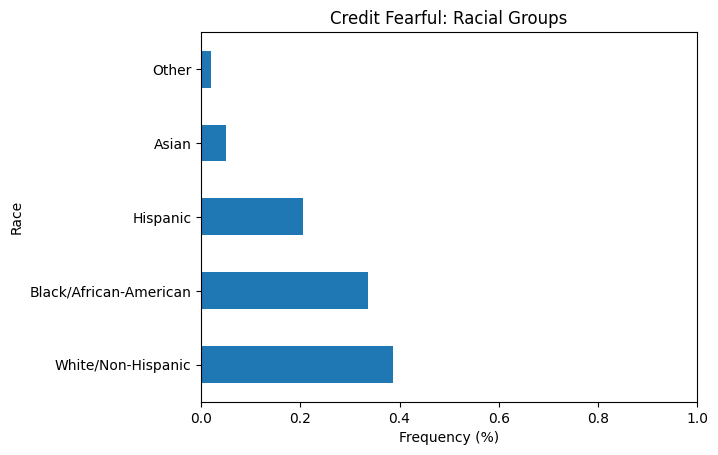

In [4]:
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    4: "Asian",
    5: "Other",
}
race = df_fear["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind = "barh")

plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");

In [5]:
race_value_counts

White/Non-Hispanic        0.386559
Black/African-American    0.337327
Hispanic                  0.206043
Asian                     0.050274
Other                     0.019797
Name: RACE, dtype: float64

The diagram implies that White/Non-Hispanic individuals express higher levels of concern regarding credit denial. However, it's crucial to approach this observation with critical thinking. The apparent disparity might stem from the fact that White/Non-Hispanic individuals constitute a larger proportion of the United States population compared to other racial groups. It's essential to consider that the survey sample was intentionally drawn to reflect the demographic diversity of the entire population.

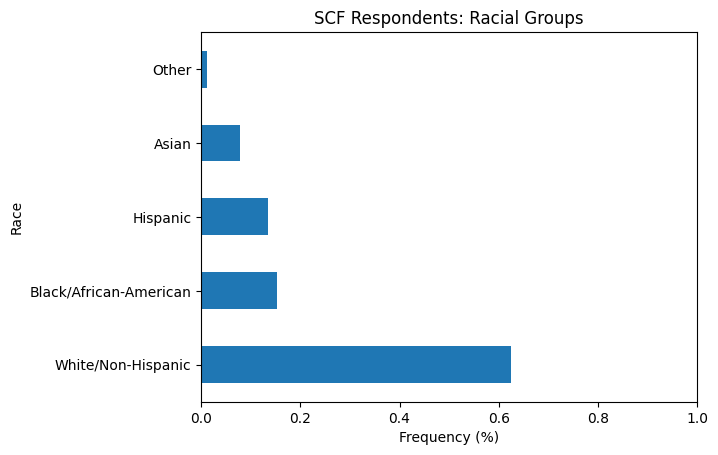

In [6]:
# Visualizing the race feature across the entire dataset.
race = df["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)

# Create bar chart of race_value_counts
race_value_counts.plot(kind = "barh")

plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

In [7]:
race_value_counts

White/Non-Hispanic        0.624548
Black/African-American    0.152035
Hispanic                  0.133841
Asian                     0.077693
Other                     0.011882
Name: RACE, dtype: float64

The data reveals that White/Non-Hispanics make up approximately 62% of the entire dataset, yet constitute only 39% of respondents expressing fear about credit. Conversely, Black and Hispanic respondents, comprising 28% of the overall dataset, represent 54% of those expressing credit-related concerns. In essence, Black and Hispanic households are statistically more likely to fall into the credit-fearful group.

It's crucial to emphasize that numbers are not inherently '*neutral*' and can perpetuate inequality. The disparities observed in the data, i.e the disproportionate representation of credit-fearful respondents among Black and Hispanic households, underscore the potential for numerical metrics to reflect and even reinforce societal imbalances. Analyzing data through a critical lens helps highlight these disparities and prompts a more nuanced understanding of the underlying social dynamics.

### 2. Age

In the [Code Book](https://sda.berkeley.edu/sdaweb/docs/scfcomb2022/DOC/hcbk.htm), we can see we have 2 possible age features:

![](../image/age2.png)

For this project, the AGECL feature would be utilized.
![](../image/age.png)

In [8]:
age_groups = df_fear["AGECL"].unique()
print("Age Groups:", age_groups)

Age Groups: [1 4 2 3 5 6]


In [9]:
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = df_fear["AGECL"].replace(agecl_dict)
age_cl.value_counts()

35-44          936
Under 35       917
45-54          802
55-64          682
65-74          398
75 or Older    104
Name: AGECL, dtype: int64

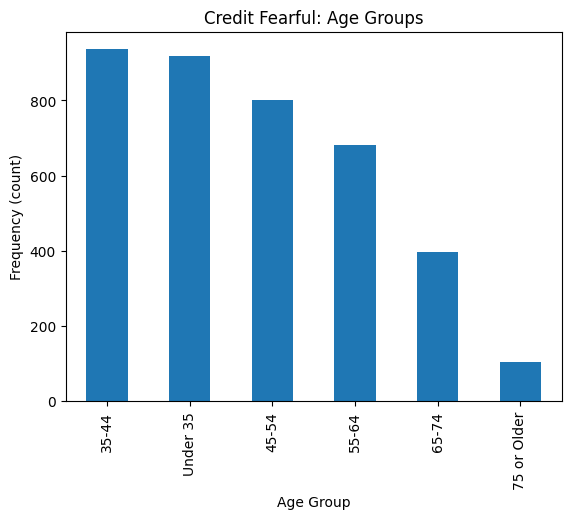

In [10]:
# Visualizing the age feature with a bar chart
age_cl_value_counts = age_cl.value_counts()

# Bar plot of `age_cl_value_counts`
age_cl_value_counts.plot(
    kind = "bar",
    xlabel = "Age Group",
    ylabel = "Frequency (count)",
    title = "Credit Fearful: Age Groups"
);


The above diagram indicates that a significant portion of individuals concerned about credit denial falls within younger age groups. However, it's essential to consider that the first two age groups cover a broader range compared to the other four. To gain a more detailed insight into the data, it would be beneficial to explore the variable "AGE". Unlike "AGECL", which is a categorical variable, "AGE" is continuous, enabling us to create a histogram for a more granular examination of the data.

![](../image/age1.png)

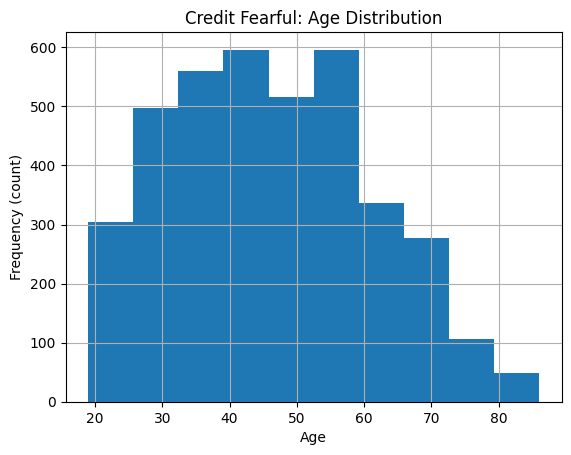

In [11]:
# Plot histogram of "AGE"
df_fear["AGE"].hist(bins=10)

plt.xlabel("Age")
plt.ylabel("Frequency (count)")
plt.title("Credit Fearful: Age Distribution");

It appears that younger individuals exhibit a higher level of concern regarding loan approval compared to their older counterparts. However, the most heightened level of concern appears to be concentrated among individuals aged between 40 and 60.

### 3. Income

In the [Code Book](https://sda.berkeley.edu/sdaweb/docs/scfcomb2022/DOC/hcbk.htm), there is an [Income Section](https://sda.berkeley.edu/sdaweb/docs/scfcomb2022/DOC/hcbk0007.htm#9.HEADING)

To explore the relationship between income and the fear of credit denial, the "INCCAT" feature will be utilized. This feature  captures income percentile groups.

![](../image/income.png)

In [12]:
df["INCCAT"].value_counts(normalize = True)

6    0.258847
1    0.173580
2    0.160435
3    0.154603
4    0.153993
5    0.098542
Name: INCCAT, dtype: float64

In [13]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = (
    df["INCCAT"]
    .replace(inccat_dict)
    .groupby(df["TURNFEAR"])
    .value_counts(normalize = True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)

df_inccat

,TURNFEAR,INCCAT,frequency
0,0,90-100,0.303982
1,0,60-79.9,0.162312
2,0,40-59.9,0.144492
3,0,0-20,0.140050
4,0,21-39.9,0.139162
5,0,80-89.9,0.110002
6,1,0-20,0.340714
7,1,21-39.9,0.266476
8,1,40-59.9,0.205001
9,1,60-79.9,0.112529


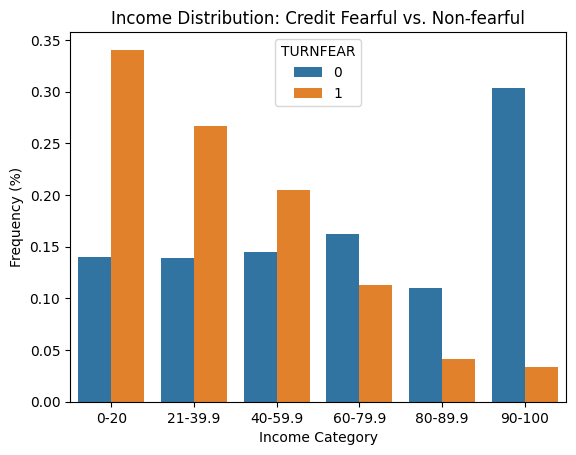

In [14]:
# Create bar chart of `df_inccat`
sns.barplot(
    x = "INCCAT",
    y = "frequency",
    hue = "TURNFEAR",
    data = df_inccat,
    order = inccat_dict.values()
)

plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

Comparing income categories between the groups expressing credit fear and those without such concerns reveals a notable prevalence of credit fearful households in the lower income brackets. In simpler terms, individuals experiencing credit anxiety tend to have lower incomes.

It can then be assumed that among respondents who expressed apprehension about credit approval following recent denials within the past five years, the majority belonged to the younger age group and lower-income brackets. This aligns with expectations, as younger individuals typically earn less and often heavily depend on credit to establish their lives. Consequently, being denied credit heightens their anxiety about future financial prospects.

### 4. Education

Comparing the education of Fearful and Non-Fearful groups:

![](../image/income.png)

In [15]:
df_educ = (
    df["EDUC"]
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)
df_educ

,TURNFEAR,EDUC,frequency
0,0,12,0.278689
1,0,8,0.174383
2,0,13,0.158967
3,0,9,0.111727
4,0,14,0.108539
5,0,10,0.049122
6,0,11,0.041283
7,0,7,0.016722
8,0,6,0.012176
9,0,4,0.010974


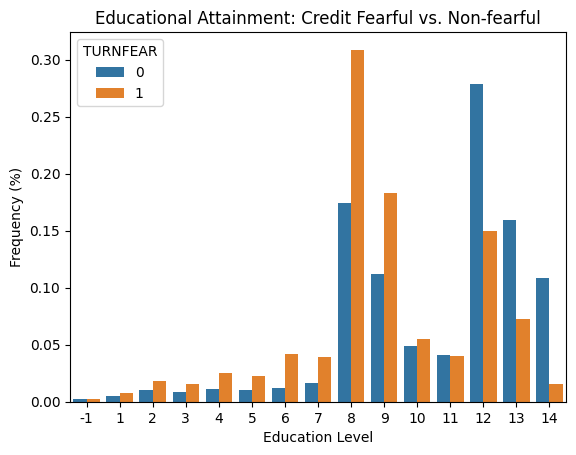

In [16]:
# Creating the bar chart of `df_educ`

sns.barplot(
    x = "EDUC",
    y = "frequency",
    hue = "TURNFEAR",
    data = df_educ
)

plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

In this plot, it can be seen that a much higher proportion of credit-fearful respondents have only a Level 8 & 9 (high school diploma), while university degrees (higher levels 12 - 14) are more common among the non-credit fearful.

### 5. Assets

Certainly, not all the information in the dataset pertains to demographics. In a banking context, emphasis often shifts from age-related details to evaluating individuals' capacity to manage debt effectively. To construct a model for this purpose, establishing relationships among various variables is essential. Creating correlation matrices serves as an effective starting point, unveiling patterns and dependencies within the data. These matrices provide insights into how different variables are interconnected, offering a clearer understanding of their mutual influences.

In [17]:
# Calculating correlation coefficients for "ASSET" and "HOUSES" in the whole dataset
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.5617765465095477


A moderate positive correlation is somewhat anticipated in this context because for a considerable number of Americans, the primary residence holds the bulk of their total assets' value. This correlation is reasonable given the significance of home ownership in contributing to individuals' overall asset value.

In [18]:
# Calculating correlation coefficients for "ASSET" and "HOUSES" in the fearful dataset
asset_house_corr = df_fear["ASSET"].corr(df_fear["HOUSES"])
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)

Credit Fearful: Asset Houses Correlation: 0.3649545427641166


The correlation between the total value of assets and the value of the primary residence appears to be less pronounced within our TURNFEAR group compared to the broader population. This could be due to a number of reasons like Financial Constraints limiting their ability to accumulate assets beyond the primary residence, credit denials or priortizing debt payment.

Making correlation matrices using the rest of the data for both df and df_fear to see if the differences persist looking at only 5 features: "ASSET", "HOUSES", "INCOME", "DEBT", and "EDUC".

In [19]:
# Correlation matrix using the total population
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.561777,0.706685,0.307143,0.120139
HOUSES,0.561777,1.000000,0.384699,0.251876,0.186120
INCOME,0.706685,0.384699,1.000000,0.306534,0.096549
DEBT,0.307143,0.251876,0.306534,1.000000,0.086561
EDUC,0.120139,0.186120,0.096549,0.086561,1.000000


In [20]:
# Correlation matrix using the credit fearful population
corr = df_fear[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.364955,0.893282,0.477171,0.110659
HOUSES,0.364955,1.000000,0.314501,0.676984,0.195174
INCOME,0.893282,0.314501,1.000000,0.456622,0.108845
DEBT,0.477171,0.676984,0.456622,1.000000,0.182570
EDUC,0.110659,0.195174,0.108845,0.182570,1.000000


The strongest correlation exists between income and assets, indicating that for individuals in the fearful category, a significant portion of their assets is derived from their income.

Additionally, there is a noteworthy correlation between debt and housing, underscoring that a substantial portion of their debt is primarily associated with mortgage obligations. This suggests that the primary residence is the predominant source of debt for individuals in the "TURNFEAR" group, a finding that aligns intuitively with expectations.

Moreover, "DEBT" and "ASSET" exhibit a striking disparity, as do "EDUC" and "DEBT," although the latter is not as stark. Nonetheless, the discernible differences in these correlations are substantial enough to pique the interest of a hypothetical banker.

### 6. Debt

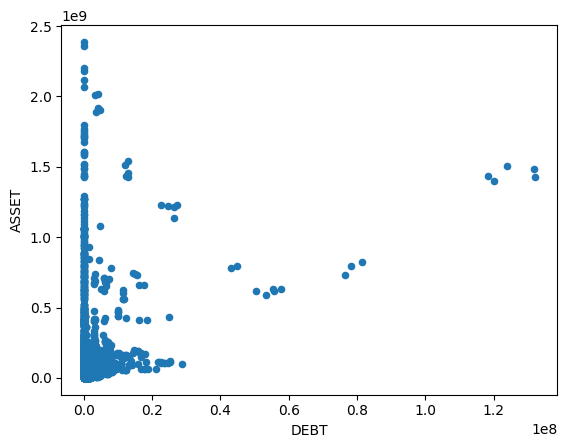

In [21]:
# Assessing the relationship between Assets and Debts for the whole population
df.plot.scatter( x = "DEBT", y = "ASSET");

There are a couple of outliers apparent in the dataset, where individuals carry substantial debts in the hundreds of millions of dollars, yet simultaneously possess assets valued in the billions of dollars. The diagram also shows that there isn't necessarily a large correlation between the debt and assets of the entire population.

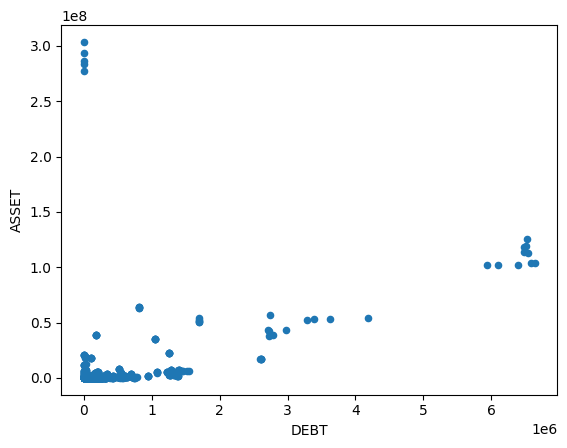

In [22]:
# Assessing the relationship between Assets and Debts for the credit fearful population
df_fear.plot.scatter( x = "DEBT", y = "ASSET");

The plot above illustrates distinct profiles within the credit fearful population. Individuals with both low debt and low assets, as well as those with very high debt and medium assets, are discernible. Additionally, individuals with low debt but higher assets are evident. This diversity highlights the existence of different classification profiles within the credit fearful population.

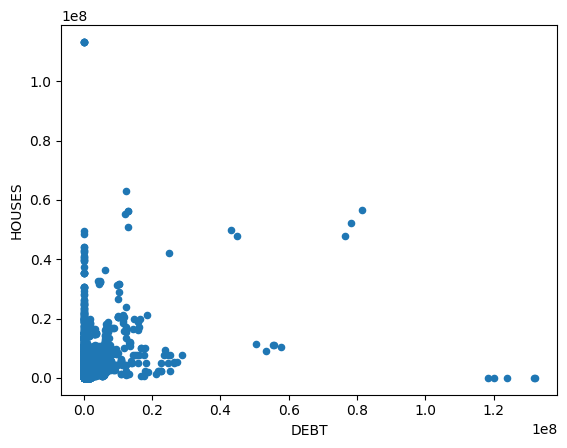

In [23]:
# Assessing the relationship between Houses and Debts for the whole population
df.plot.scatter( x = "DEBT", y = "HOUSES");

There is just a moderate correlation between debt and home value. We can see a couple of clusters

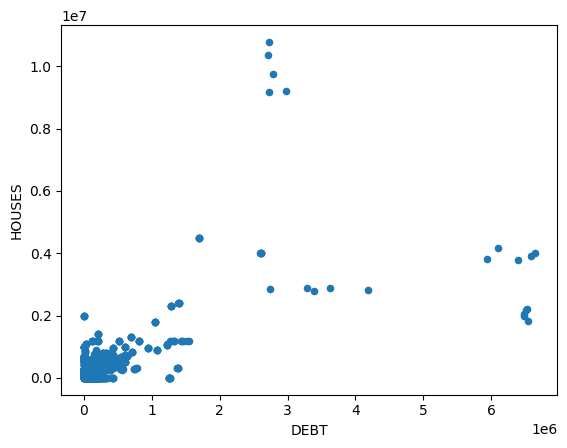

In [24]:
# Assessing the relationship between Assets and Debts for the credit fearful population
df_fear.plot.scatter( x = "DEBT", y = "HOUSES");

The presence of outliers in the data makes it somewhat challenging to discern the differences between these two plots. However, the overall relationship is still evident: the graph for the credit fearful group (df_fear) exhibits an almost perfect linear relationship, whereas the graph for the entire dataset (df) appears more intricate or muddled. Additionally, there are more distinct clusters observable within the credit fearful group.